Lab Assignment 10

Assignment Title: NLP using Python-II

(Feature extraction from text, sentiment analysis and text generation)

In [1]:
# Install required packages
!pip install nltk textblob wordcloud scikit-learn keras tensorflow
!python -m textblob.download_corpora

import nltk
nltk.download(['punkt', 'stopwords', 'wordnet'])

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuation using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribution (excluding stopwords).


In [2]:
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Sample paragraph
text = """
Machine learning is revolutionizing how we analyze data. Deep learning models can now recognize patterns better than humans in some tasks. AI applications range from healthcare diagnostics to self-driving cars. Natural language processing enables computers to understand human language. The field continues to advance rapidly with new architectures like transformers.
"""

# 1. Convert to lowercase and remove punctuation using re
text_lower = text.lower()
text_clean = re.sub(f'[{string.punctuation}]', '', text_lower)

# 2. Tokenize
words_split = text_clean.split()  # Python split
words_tokenized = word_tokenize(text_clean)  # NLTK tokenize
sentences = sent_tokenize(text)

# 3. Compare tokenization methods
print("Python split() vs NLTK word_tokenize():")
print(f"split(): {words_split}")
print(f"word_tokenize(): {words_tokenized}\n")

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_tokenized if word not in stop_words]

# 5. Word frequency
fdist = FreqDist(filtered_words)
print("Word Frequency Distribution:")
print(fdist.most_common())

Python split() vs NLTK word_tokenize():
split(): ['machine', 'learning', 'is', 'revolutionizing', 'how', 'we', 'analyze', 'data', 'deep', 'learning', 'models', 'can', 'now', 'recognize', 'patterns', 'better', 'than', 'humans', 'in', 'some', 'tasks', 'ai', 'applications', 'range', 'from', 'healthcare', 'diagnostics', 'to', 'selfdriving', 'cars', 'natural', 'language', 'processing', 'enables', 'computers', 'to', 'understand', 'human', 'language', 'the', 'field', 'continues', 'to', 'advance', 'rapidly', 'with', 'new', 'architectures', 'like', 'transformers']
word_tokenize(): ['machine', 'learning', 'is', 'revolutionizing', 'how', 'we', 'analyze', 'data', 'deep', 'learning', 'models', 'can', 'now', 'recognize', 'patterns', 'better', 'than', 'humans', 'in', 'some', 'tasks', 'ai', 'applications', 'range', 'from', 'healthcare', 'diagnostics', 'to', 'selfdriving', 'cars', 'natural', 'language', 'processing', 'enables', 'computers', 'to', 'understand', 'human', 'language', 'the', 'field', 'cont

Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmatization with WordNetLemmatizer
5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over
the other.


In [3]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 1. Extract alphabetic words
alpha_words = re.findall(r'\b[a-z]+\b', text_clean)

# 2. Remove stopwords
filtered_alpha = [word for word in alpha_words if word not in stop_words]

# 3. Stemming
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in filtered_alpha]

# 4. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in filtered_alpha]

# 5. Compare
print("\nOriginal:", filtered_alpha)
print("Stemmed:", stemmed)
print("Lemmatized:", lemmas)

print("\nComparison (first 5 words):")
for i in range(5):
    print(f"{filtered_alpha[i]:<15} {stemmed[i]:<15} {lemmas[i]}")

print("\nStemming is faster but crude (cuts endings), lemmatization is slower but returns dictionary forms.")
print("Use stemming for quick preprocessing, lemmatization when word forms matter.")


Original: ['machine', 'learning', 'revolutionizing', 'analyze', 'data', 'deep', 'learning', 'models', 'recognize', 'patterns', 'better', 'humans', 'tasks', 'ai', 'applications', 'range', 'healthcare', 'diagnostics', 'selfdriving', 'cars', 'natural', 'language', 'processing', 'enables', 'computers', 'understand', 'human', 'language', 'field', 'continues', 'advance', 'rapidly', 'new', 'architectures', 'like', 'transformers']
Stemmed: ['machin', 'learn', 'revolution', 'analyz', 'data', 'deep', 'learn', 'model', 'recogn', 'pattern', 'better', 'human', 'task', 'ai', 'applic', 'rang', 'healthcar', 'diagnost', 'selfdriv', 'car', 'natur', 'languag', 'process', 'enabl', 'comput', 'understand', 'human', 'languag', 'field', 'continu', 'advanc', 'rapidli', 'new', 'architectur', 'like', 'transform']
Lemmatized: ['machine', 'learning', 'revolutionizing', 'analyze', 'data', 'deep', 'learning', 'model', 'recognize', 'pattern', 'better', 'human', 'task', 'ai', 'application', 'range', 'healthcare', 'di

Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representation.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample texts
texts = [
    "New AI model breaks performance records",
    "Tech company launches innovative blockchain solution",
    "Researchers develop quantum computing breakthrough"
]

# 1. Bag of Words
count_vec = CountVectorizer()
bow = count_vec.fit_transform(texts)
print("\nBag of Words:")
print(bow.toarray())
print("Vocabulary:", count_vec.get_feature_names_out())

# 2. TF-IDF
tfidf_vec = TfidfVectorizer()
tfidf = tfidf_vec.fit_transform(texts)

# 3. Top keywords
print("\nTop 3 keywords per text:")
for i, doc in enumerate(texts):
    feature_index = tfidf[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf[i, x] for x in feature_index])
    sorted_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
    top_features = [tfidf_vec.get_feature_names_out()[i] for (i, s) in sorted_scores[:3]]
    print(f"Text {i+1}: {top_features}")


Bag of Words:
[[1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1]
 [0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0]]
Vocabulary: ['ai' 'blockchain' 'breaks' 'breakthrough' 'company' 'computing' 'develop'
 'innovative' 'launches' 'model' 'new' 'performance' 'quantum' 'records'
 'researchers' 'solution' 'tech']

Top 3 keywords per text:
Text 1: ['new', 'ai', 'model']
Text 2: ['tech', 'company', 'launches']
Text 3: ['researchers', 'develop', 'quantum']


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:

a. Jaccard Similarity using sets

b. Cosine Similarity using TfidfVectorizer + cosine_similarity()

c. Analyze which similarity metric gives better insights in your case.


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample texts
text1 = """
Artificial intelligence simulates human intelligence in machines.
AI systems can learn, reason, and solve problems.
Applications include speech recognition and decision making.
"""

text2 = """
Blockchain is a decentralized digital ledger technology.
It enables secure transactions without intermediaries.
Used in cryptocurrencies and supply chain tracking.
"""

# Preprocess
def preprocess(text):
    text = re.sub(f'[{string.punctuation}]', '', text.lower())
    return set(word_tokenize(text))

set1 = preprocess(text1)
set2 = preprocess(text2)

# Jaccard Similarity
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard = intersection / union
print(f"\nJaccard Similarity: {jaccard:.2f}")

# Cosine Similarity
tfidf = TfidfVectorizer().fit_transform([text1, text2])
cosine = cosine_similarity(tfidf[0], tfidf[1])[0][0]
print(f"Cosine Similarity: {cosine:.2f}")

print("\nCosine similarity works better for longer texts with shared vocabulary.")
print("Jaccard is simpler but ignores term frequency and importance.")


Jaccard Similarity: 0.05
Cosine Similarity: 0.07

Cosine similarity works better for longer texts with shared vocabulary.
Jaccard is simpler but ignores term frequency and importance.


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews.


Polarity: 0.39 (Positive)
Subjectivity: 0.49


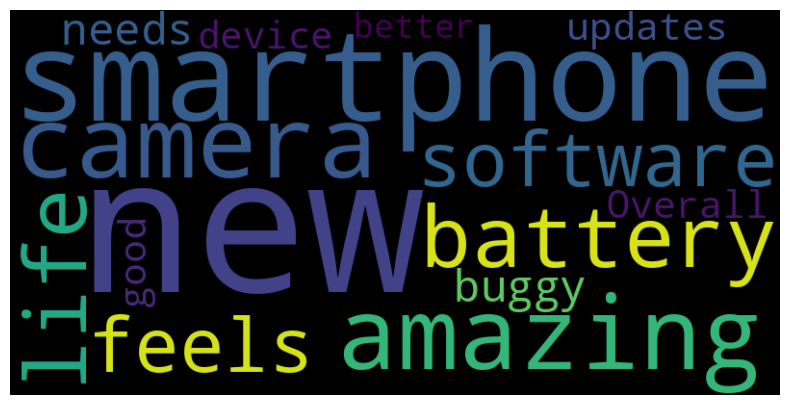

In [6]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample review
review = """
The new smartphone has an amazing camera and battery life.
However, the software feels buggy and needs updates.
Overall it's a good device but could be better.
"""

# Sentiment analysis
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f"\nPolarity: {polarity:.2f} (Positive)" if polarity > 0 else
      "(Negative)" if polarity < 0 else "(Neutral)")
print(f"Subjectivity: {subjectivity:.2f}")

# Word cloud
if polarity > 0:
    wordcloud = WordCloud(width=800, height=400).generate(review)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starting from any seed word you
provide.

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Training text
training_text = """
Machine learning is transforming industries across the world.
Deep learning models achieve state-of-the-art results in many tasks.
Natural language processing enables computers to understand human language.
AI applications are becoming more sophisticated every year.
"""

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in training_text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and label
X = input_sequences[:,:-1]
y = input_sequences[:,-1]

# Simple model
model = Sequential([
    Embedding(total_words, 10, input_length=max_sequence_len-1),
    LSTM(50),
    Dense(total_words, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, verbose=0)

# Generate text
seed_text = "AI"
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print("\nGenerated text:")
print(seed_text)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Generated text:
AI learning learning learning learning the
